In [1]:
import cv2
import numpy as np
import pickle
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
from inference import Inference

In [2]:
inf = Inference()
images = inf.run_all()

case1 inspected max_var: 0.0
case1 reference max_var: 0.0
case2 inspected max_var: 0.0
case2 reference max_var: 0.0
case3 inspected max_var: 0.0
case3 reference max_var: 0.0

start working on case1 alignment...

start working on case2 alignment...

start working on case3 alignment...

computes inspected-to-reference diff images

predicting the defects maps

done execution


In [3]:
images

{'case1': {'inspected': array([[101, 103, 109, ..., 125, 104, 111],
         [122,  96, 110, ..., 105, 127, 109],
         [ 93, 112, 127, ..., 107, 114, 120],
         ...,
         [ 54,  51,  59, ..., 121, 125, 111],
         [ 51,  54,  55, ...,  99, 114, 103],
         [ 45,  43,  52, ..., 103, 121,  87]], dtype=uint8),
  'reference': array([[121, 113,  99, ..., 126,  94, 100],
         [123, 112, 115, ...,  97, 110,  95],
         [ 84, 111, 123, ..., 116, 113, 104],
         ...,
         [140, 126, 114, ..., 129, 125, 108],
         [ 72,  63,  56, ..., 117, 111, 105],
         [ 46,  39,  49, ...,  96, 119, 105]], dtype=uint8),
  'shifted_reference_image': array([[ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         ...,
         [47, 46, 51, ...,  0,  0,  0],
         [51, 46, 48, ...,  0,  0,  0],
         [45, 44, 49, ...,  0,  0,  0]], dtype=uint8),
  'err': array([[101, 103, 109, ..., 125, 104, 111],
      

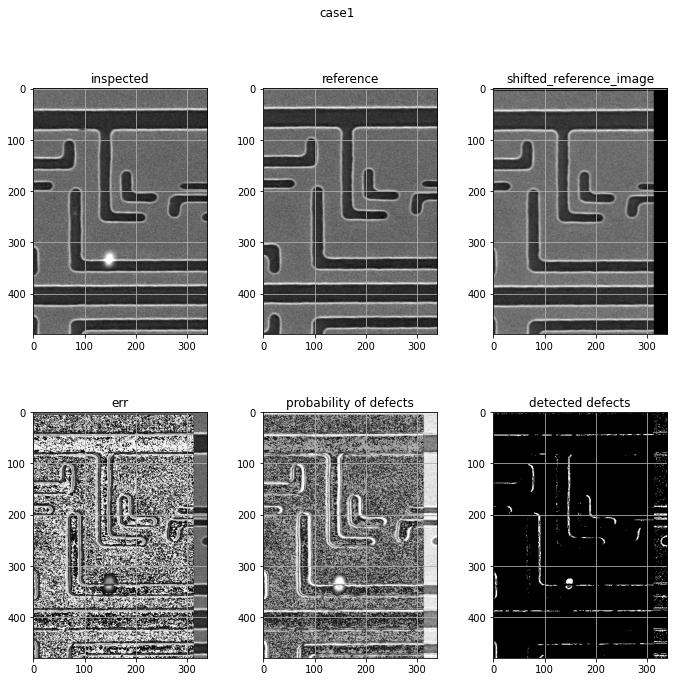

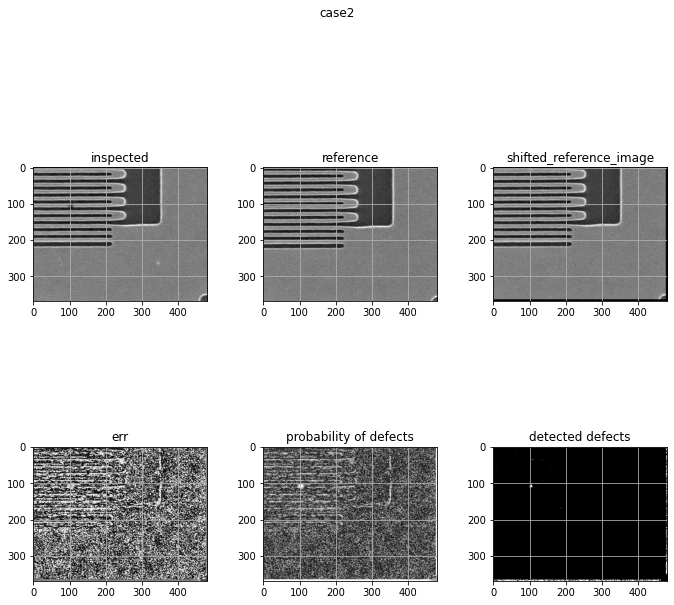

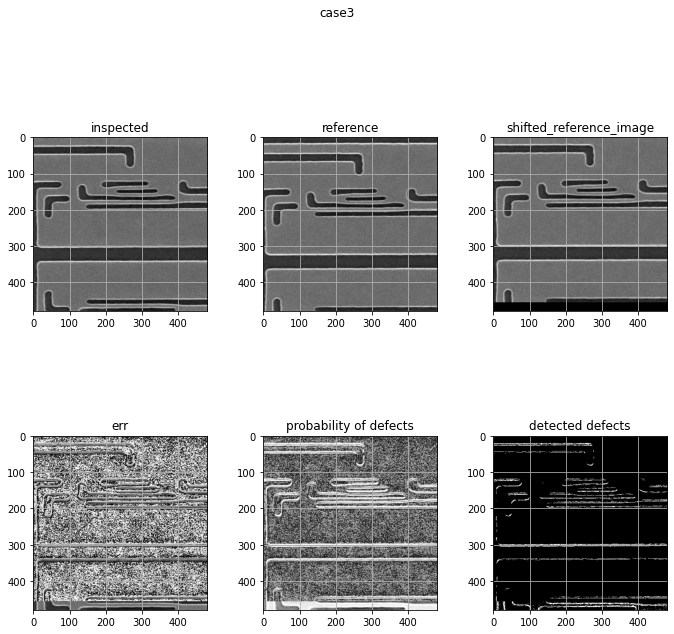

In [47]:
for case in images:
    
    fig, axs = plt.subplots(2, 3, figsize=(10, 10))
    
    axs[0, 0].imshow(images[case]['inspected'],cmap='gray')
    axs[0, 0].grid()
    axs[0, 0].set_title('inspected')
    
    axs[0, 1].imshow(images[case]['reference'], cmap='gray')
    axs[0, 1].grid()
    axs[0, 1].set_title('reference')
    
    axs[0, 2].imshow(images[case]['shifted_reference_image'], cmap='gray')
    axs[0, 2].grid()
    axs[0, 2].set_title('shifted_reference_image')
    
    axs[1, 0].imshow(images[case]['err'], cmap='gray')
    axs[1, 0].grid()
    axs[1, 0].set_title('err')
    
    axs[1, 1].imshow(images[case]['P_defects'], cmap='gray')
    axs[1, 1].grid()
    axs[1, 1].set_title('probability of defects')
    
    axs[1, 2].imshow(images[case]['prediction_mask'], cmap='gray')
    axs[1, 2].grid()
    axs[1, 2].set_title('detected defects')

    fig.suptitle(case)
    fig.tight_layout(pad=3)
    plt.show()
    print('\n\n')


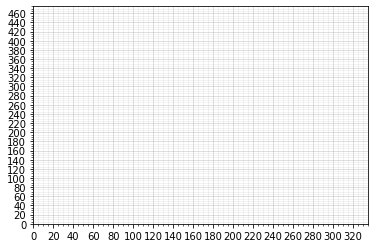

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Major ticks every 20, minor ticks every 5
major_x_ticks = np.arange(0, img.shape[1], 20)
minor_x_ticks = np.arange(0, img.shape[1], 5)

major_y_ticks = np.arange(0, img.shape[0], 20)
minor_y_ticks = np.arange(0, img.shape[0], 5)

ax.set_xticks(major_x_ticks)
ax.set_xticks(minor_x_ticks, minor=True)
ax.set_yticks(major_y_ticks)
ax.set_yticks(minor_y_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

plt.show()

In [19]:
major_y_ticks[::-1]

array([460, 440, 420, 400, 380, 360, 340, 320, 300, 280, 260, 240, 220,
       200, 180, 160, 140, 120, 100,  80,  60,  40,  20,   0])